In [98]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import numpy as np
from numpy import ndarray
from numpy import genfromtxt
from numpy import mean
from numpy.random import rand
from scipy.integrate import quad
import sys
import scipy
np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

#Q1

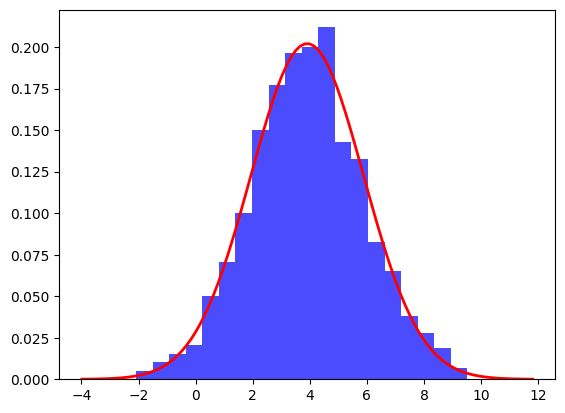

2. the average of the dataset is 3.9093400000000003


In [99]:
X = genfromtxt('problem_3_data.csv', delimiter=',')
n, bins, patches = plt.hist(X,20, facecolor = 'blue', density = True, alpha= 0.7)
#plot uniform distribution over histogram
def normal_distribution(x, sigma, mu):
  return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
def p(x,X):
  return normal_distribution(x, np.std(X), np.mean(X))

x = np.linspace(np.mean(X)-4*np.std(X), np.mean(X)+4*np.std(X), 100)
y = p(x,X)
plt.plot(x,y, linewidth=2, color='r')
plt.show()

#Q2

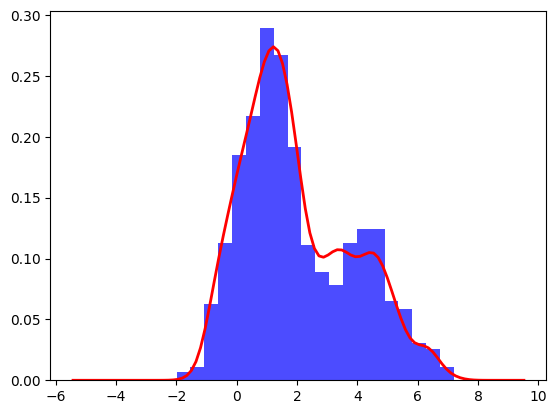

In [100]:
X = genfromtxt('problem_4_data.csv', delimiter=',')
n, bins, patches = plt.hist(X, 20, facecolor = 'blue', density = True, alpha= 0.7)
mew = np.mean(X)
sigma = 0.35
n = len(X)

def p(x): # This is the kde p(x) distribution
	def gaussian(mew, sigma, x): return np.exp(-0.5 * ((x - mew) / sigma)**2) / (sigma * np.sqrt(2*np.pi))
	px = 0

	for i in range(1000):
		ind = np.random.randint(0, len(X))
		xi = X[ind]
		px += gaussian(xi, sigma, x)
	return px/n

x = np.linspace(np.mean(X)-4*np.std(X), np.mean(X)+4*np.std(X), 100)
y = p(x)
plt.plot(x,y, linewidth=2, color='r')
plt.show()

In [101]:
#Actual integral
def f(x):
  return x**2 - 3 * x + 4
result, error = quad(f, 0, 2)
print(result)

4.666666666666666


In [102]:
#Approximate using sampling straight from uniform
def sample(n, a, b):
  result = scipy.stats.uniform.rvs(size=n, loc=a, scale=b)
  return result

def approximate(function, type_, a, b, n):
  X = sample(n, a, b)
  return 2 * np.mean(function(X))

approximate(f,'uniform', 0, 2, 5000)

4.672837518813331

In [103]:
#Approximate using rejection sampling from a uniform distribution
def rejection_sampling_from_uniform (n):
  accepted_samples = []
  while len(accepted_samples) < n:
        # Step 1: Sample from the proposal distribution (uniform [a, b])
        x_candidate = np.random.uniform(0, 2)

        # Step 2: Generate a uniform random number between 0 and 1 (envelope function)
        u = 2 * np.random.uniform(0, 2)

        # Step 3: Accept or reject the sample
        if u <= 1 / (2 - 0):  # f(x) = 1 / (b - a) for uniform distribution
            accepted_samples.append(x_candidate)
  return np.array(accepted_samples)

def approximate(n, function):
  X = rejection_sampling_from_uniform(n)
  return 2 * np.mean(f(X))
approximate(5000, f)

4.663193837926272

In [104]:
#Approximate using importance sampling
def exponential(x, lmbda):
  return (lmbda) * np.exp(-x * lmbda)
def g(x):
  return 1*(x**2 - 3 * x + 4)/exponential(x,1)
#where q(x) is an exponential function, sampling from it by generating uniform then plugging those into exponential function
X = np.random.uniform(0, 1, 5000)
X = exponential(X, 1)
#f(x) is x**2 - 3 * x + 4, p(x) is 1 from 0-1 wheen integrated from uniform distribution, q(x) is exponential
print('Integral using importance sampling: %.3f'% (np.mean((g(X)))))

Integral using importance sampling: 4.749


#Q4

In [203]:
X = genfromtxt('complex_distribution.csv', delimiter=',')

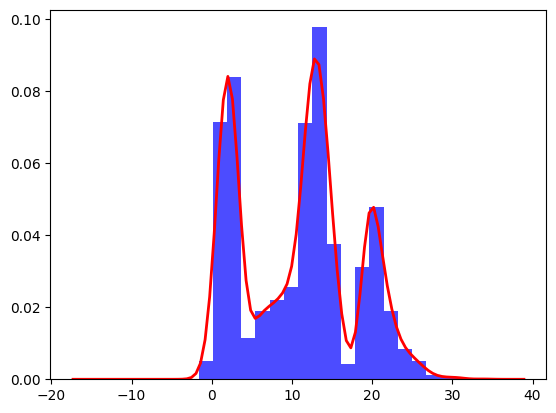

array([0.0651, 0.0841, 0.0664])

In [166]:
n, bins, patches = plt.hist(X,20, facecolor = 'blue', density = True, alpha= 0.7)
sigma = 1
n = len(X)

def p(x): # This is the kde p(x) distribution
	def gaussian(μ, sigma, x): return np.exp(-0.5 * ((x - μ) / sigma)**2) / (sigma * np.sqrt(2*np.pi))
	px = 0
	for xi in X:
		px += gaussian(xi, sigma, x)
	return px/n

x = np.linspace(np.mean(X)-4*np.std(X), np.mean(X)+4*np.std(X), 100)
y = p(x)
plt.plot(x,y, linewidth=2, color='r')
plt.show()

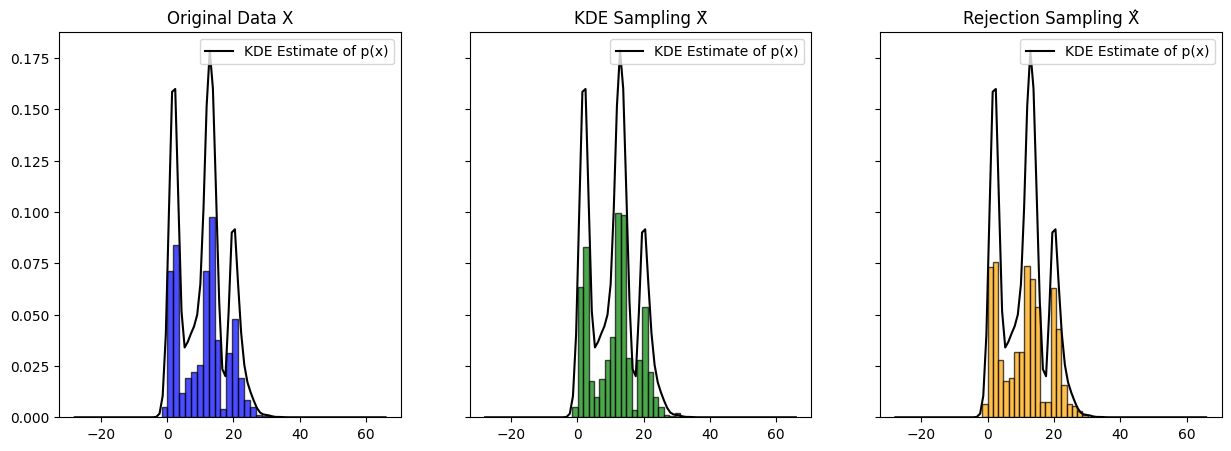

In [201]:
# X_hat using Rejection Sampling
x_min, x_max = np.min(X), np.max(X)
q_x = 1 / (x_max - x_min)  # Uniform proposal distribution
k = 2  # Scaling factor to ensure q(x) > p(x)
q_x_scaled = k * q_x

num_samples = 1000
X_hat = []

while len(X_hat) < num_samples:
    x_candidate = np.random.uniform(x_min, x_max)  # sample from q(x)
    u = np.random.uniform(0, 1)  # unifrom dist, pick sample from orig

    # p(x_candidate) using the KDE approach
    p_x_candidate = np.mean(scipy.stats.norm.pdf(x_candidate, X, σ))

    if u < (p_x_candidate / q_x_scaled):
        X_hat.append(x_candidate)

# X_hat rejection
X_hat = np.array(X_hat)

# X_bar using KDE sampling
X_bar = X[np.random.randint(0, n, num_samples)] + np.random.normal(0, σ, num_samples)  # Sample with Gaussian noise

# plot 3 histograms side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# hist of original data X
axes[0].hist(X, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
axes[0].plot(x, p(x), color='black', label="KDE Estimate of p(x)")
axes[0].set_title("Original Data X")
axes[0].legend()

# hist of X_bar (KDE sampling)
axes[1].hist(X_bar, bins=20, density=True, alpha=0.7, color='green', edgecolor='black')
axes[1].plot(x, p(x), color='black', label="KDE Estimate of p(x)")
axes[1].set_title("KDE Sampling X̄")
axes[1].legend()

# hist of X_hat (Rejection Sampling)
axes[2].hist(X_hat, bins=20, density=True, alpha=0.7, color='orange', edgecolor='black')
axes[2].plot(x, p(x), color='black', label="KDE Estimate of p(x)")
axes[2].set_title("Rejection Sampling X̂")
axes[2].legend()

plt.show()

#Q5

In [181]:
def f(x):
  return np.log(x+1)
n = 10000
estimate = np.mean(f(np.random.uniform(0, 2, n)))
print(f"Estimate of Integral: {2 * estimate:.5f}")

Estimate of Integral: 1.29341


#Q6

In [108]:

def f(x):
    return x / (x**2 - x + 1)
n = 10000
samples = np.random.uniform(0, 1, n)
estimate = np.mean(f(samples))
print(f"Estimate of Integral: {estimate:.5f}")

Estimate of Integral: 0.60418
